In [1]:
import behaviour as bh
import pathosim as inf 
import numpy as np
import synthpops as sp
import sciris as sc

PathoSim 3.1.2 (2022-01-16) — © 2023 by McGill University


In [2]:
pars = {'n': 10e3, 'sheet_name': 'Canada','country_location': 'canada','use_default': True}

In [3]:
canada_pop = bh.BehaviourModel(pars)

Initializing Behaviour Module...
========== setting country location = canada


In [4]:
BC_pop = bh.BehaviourModel({'n': 10e3, 'sheet_name': 'Canada','country_location': 'canada', 'state_location': 'BC', 'use_default': True})

Initializing Behaviour Module...
========== setting country location = canada


Initializing sim with 10000 people for 365 days
  Running 2020-03-01 ( 0/365) (2.83 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (3.12 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (3.49 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (3.85 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (4.19 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (4.55 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (4.93 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (5.33 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (5.77 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (6.19 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (6.71 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (7.34 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (7.79 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (8.23 s)  •••••••————————————— 36%
  Running 2020-07-19 (140/365) (8.66 s)  •

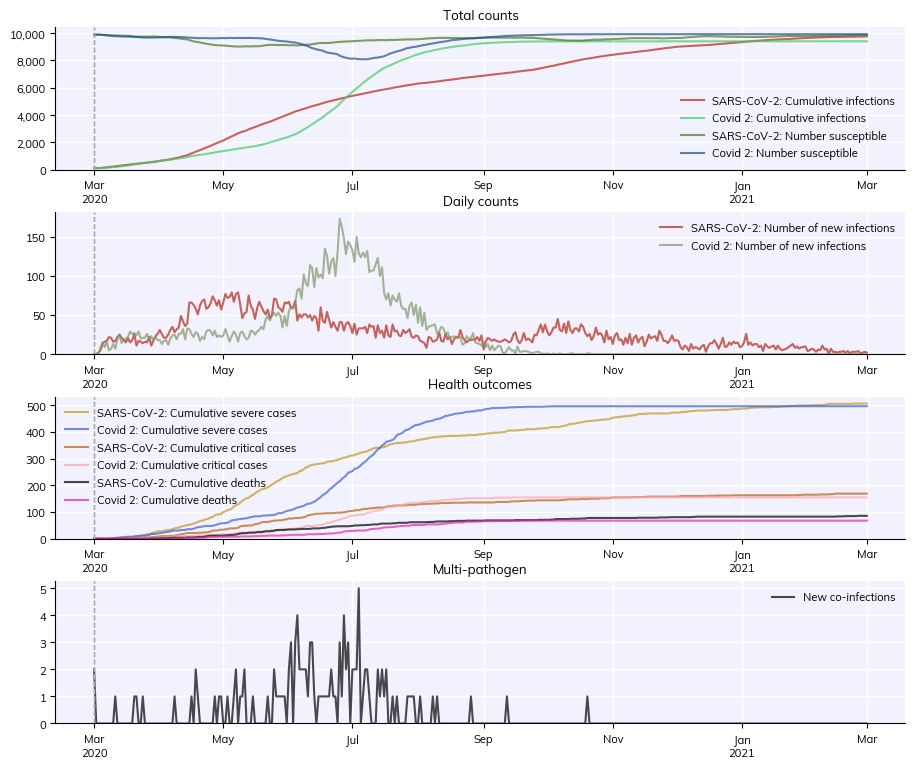

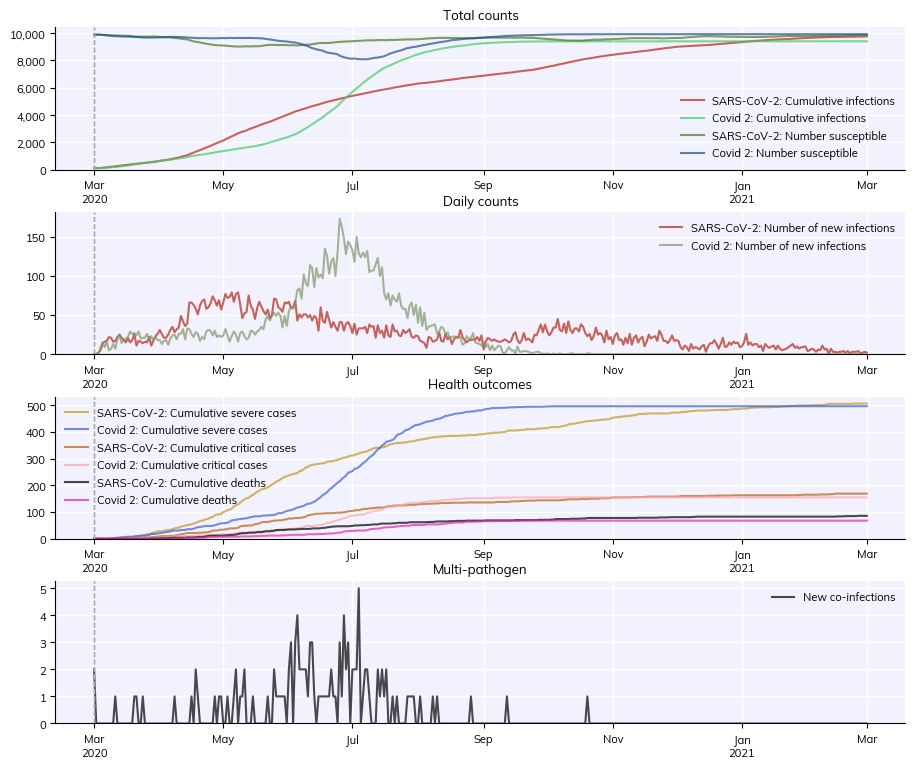

In [5]:
import behaviour as bh
import pathosim as inf 
import numpy as np
import sciris as sc

# ---- DEMO SHOWCASING TESTING AND CONTACT TRACING INTERVENTIONS ---- #

#Define basic simulation parameters
n_days = 365
pop_size = 10000
   
#Create synthetic population using the BehaviourModel module
pop = BC_pop


#Create pathogens (2 pathogens which in this case are 2 pathogen with SARS-CoV-2 parameters)
covid = inf.SARS_COV_2(100)  
second_path = inf.SARS_COV_2(100)
second_path.label = 'Covid 2' 

#Create testing interventions and specify as an argument the pathogen it is for
tn = inf.test_num(daily_tests=500, pathogen = 0)
tn1 = inf.test_num(daily_tests=500, pathogen = 1) 

#Alternative testing intervention, based on probabilities:
#tp = inf.test_prob(symp_prob=0.2, asymp_prob=0.001, symp_quar_prob=1.0, asymp_quar_prob=1.0, do_plot=False, pathogen = 0)
#tp2 = inf.test_prob(symp_prob=0.2, asymp_prob=0.001, symp_quar_prob=1.0, asymp_quar_prob=1.0, do_plot=False, pathogen = 1) 


#create the contact tracing intervention and specify which pathogens are affected as an array of pathogens
#ct = inf.contact_tracing(trace_probs=dict(h=1.0, s=0.5, w=0.5, c=0.3), do_plot=False, pathogens = [0,1])   #Quarantining after notified
nc = inf.notify_contacts(trace_probs={'h': 1, 's': 0.2, 'w': 0.2, 'c': 0.03},                               #Just notification
                                  trace_time={'h': 0, 's': 1, 'w': 1, 'c': 2}, pathogens = [0])

#Run the simulation
sim = inf.Sim(pop_size=pop_size, people = pop, n_days=n_days, interventions = [tn1, tn], pathogens = [covid, second_path])  
sim.run()     
 
sim.plot('multi-pathogen') #Plot using specific display settings for multi-pathogen. Shows co-infections.

Initializing sim with 10000 people for 365 days
  Running 2020-03-01 ( 0/365) (1.70 s)  ———————————————————— 0%
  Running 2020-03-11 (10/365) (1.87 s)  ———————————————————— 3%
  Running 2020-03-21 (20/365) (2.08 s)  •——————————————————— 6%
  Running 2020-03-31 (30/365) (2.31 s)  •——————————————————— 8%
  Running 2020-04-10 (40/365) (2.58 s)  ••—————————————————— 11%
  Running 2020-04-20 (50/365) (2.82 s)  ••—————————————————— 14%
  Running 2020-04-30 (60/365) (3.09 s)  •••————————————————— 17%
  Running 2020-05-10 (70/365) (3.35 s)  •••————————————————— 19%
  Running 2020-05-20 (80/365) (3.64 s)  ••••———————————————— 22%
  Running 2020-05-30 (90/365) (3.89 s)  ••••———————————————— 25%
  Running 2020-06-09 (100/365) (4.20 s)  •••••——————————————— 28%
  Running 2020-06-19 (110/365) (4.51 s)  ••••••—————————————— 30%
  Running 2020-06-29 (120/365) (4.83 s)  ••••••—————————————— 33%
  Running 2020-07-09 (130/365) (5.12 s)  •••••••————————————— 36%
  Running 2020-07-19 (140/365) (5.40 s)  •

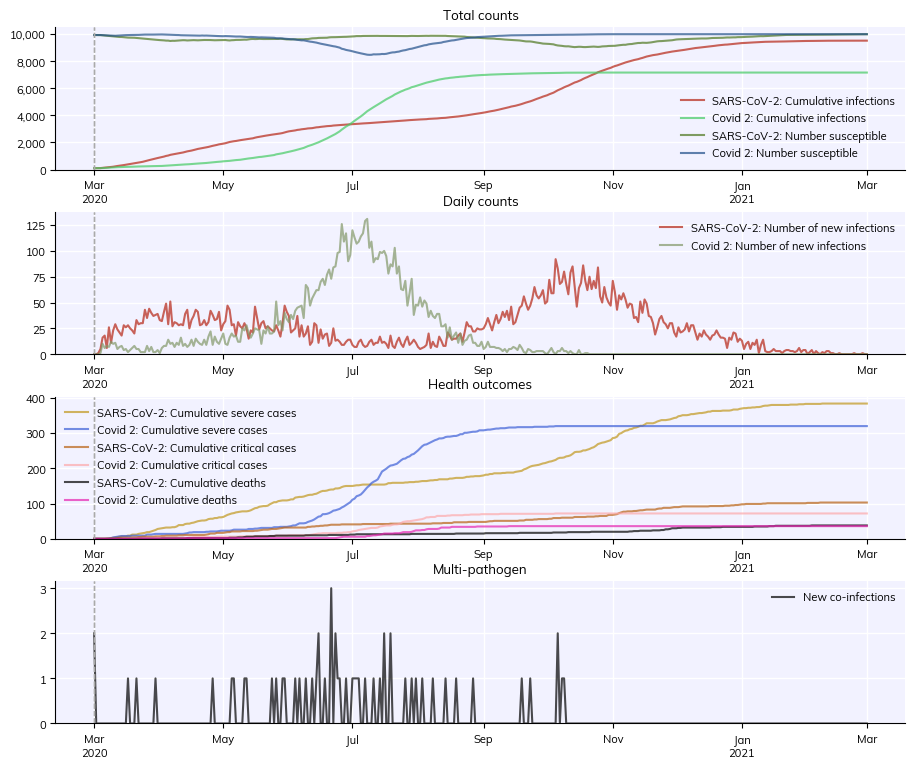

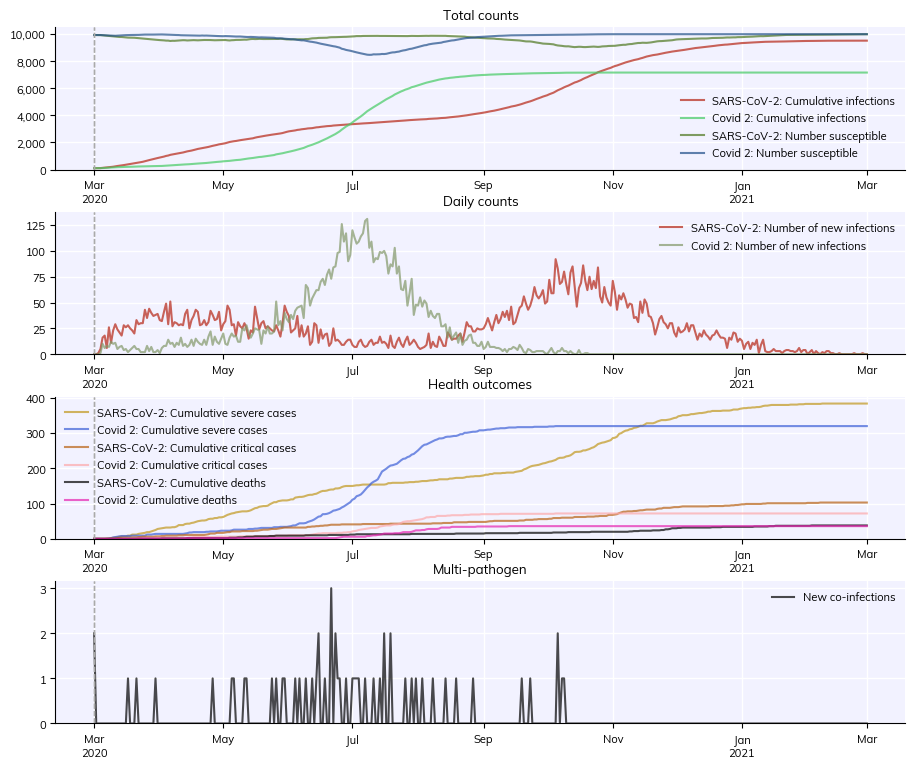

In [7]:
import behaviour as bh
import pathosim as inf 
import numpy as np
import sciris as sc

# ---- DEMO SHOWCASING TESTING AND CONTACT TRACING INTERVENTIONS ---- #

#Define basic simulation parameters
n_days = 365
pop_size = 10000
   
#Create synthetic population using the BehaviourModel module
pop = canada_pop


#Create pathogens (2 pathogens which in this case are 2 pathogen with SARS-CoV-2 parameters)
covid = inf.SARS_COV_2(100)  
second_path = inf.SARS_COV_2(100)
second_path.label = 'Covid 2' 

#Create testing interventions and specify as an argument the pathogen it is for
tn = inf.test_num(daily_tests=500, pathogen = 0)
tn1 = inf.test_num(daily_tests=500, pathogen = 1) 

#Alternative testing intervention, based on probabilities:
#tp = inf.test_prob(symp_prob=0.2, asymp_prob=0.001, symp_quar_prob=1.0, asymp_quar_prob=1.0, do_plot=False, pathogen = 0)
#tp2 = inf.test_prob(symp_prob=0.2, asymp_prob=0.001, symp_quar_prob=1.0, asymp_quar_prob=1.0, do_plot=False, pathogen = 1) 


#create the contact tracing intervention and specify which pathogens are affected as an array of pathogens
#ct = inf.contact_tracing(trace_probs=dict(h=1.0, s=0.5, w=0.5, c=0.3), do_plot=False, pathogens = [0,1])   #Quarantining after notified
nc = inf.notify_contacts(trace_probs={'h': 1, 's': 0.2, 'w': 0.2, 'c': 0.03},                               #Just notification
                                  trace_time={'h': 0, 's': 1, 'w': 1, 'c': 2}, pathogens = [0])

#Run the simulation
sim = inf.Sim(pop_size=pop_size, people = pop, n_days=n_days, interventions = [tn1, tn], pathogens = [covid, second_path])  
sim.run()     
 
sim.plot('multi-pathogen') #Plot using specific display settings for multi-pathogen. Shows co-infections.